In [2]:
# 女子大生身長データ
tall_list = [
    151, 154, 158, 162,
    154, 152, 151, 167,
    160, 161, 155, 159,
    160, 160, 155, 153,
    163, 160, 165, 146,
    156, 153, 165, 156,
    158, 155, 154, 160,
    156, 163, 148, 151,
    154, 160, 169, 151,
    160, 159, 158, 157,
    154, 164, 146, 151,
    162, 158, 166, 156,
    156, 150, 161, 166,
    162, 155, 143, 159,
    157, 157, 156, 157,
    162, 161, 156, 156,
    162, 168, 149, 159,
    169, 162, 162, 156,
    150, 153, 159, 156,
    162, 154, 164, 161
]

In [29]:
from math import ceil, floor
# 度数分布を作る
# 1. 最大値・最小値を決める（きりが良い感じに）
tall_max = round(max(tall_list), -1)
tall_min = round(min(tall_list), -1)
print('1. max: {}, min: {}'.format(tall_max, tall_min))

# 2. 階級を作る（最大・最小の範囲内で，5~8個の範囲に区切る
tall_range = tall_max - tall_min
class_num = 6
tall_bin = ceil(tall_range / class_num)
print('2. range: {}, bin: {}'.format(tall_range, tall_bin))

# 3. 各階級の代表値を決める
class_values = [tall_min + ceil(tall_bin / 2.) + tall_bin * v for v in range(class_num)]
print('3. class values: {}'.format(class_values))

# 4. 各階級に入る数をカウントする
# 階級の範囲が奇数の場合のための切り捨て・切り上げ処理あり
classes = [(v - ceil(tall_bin / 2.), v + floor(tall_bin / 2.)) for v in class_values]
freq_by_key = {}
for cls, cls_v in zip(classes, class_values):
    if str(cls_v) not in freq_by_key:
        freq_by_key[str(cls_v)] = 0
    for tall in tall_list:
        if cls[0] < tall and tall <= cls[1]:
            freq_by_key[str(cls_v)] += 1
s = 0
for key in freq_by_key:
    s += freq_by_key[key]

print('4. freq dist: {}'.format(freq_by_key))
print('   number of data: {}'.format(s))

1. max: 170, min: 140
2. range: 30, bin: 5
3. class values: [143, 148, 153, 158, 163, 168]
4. freq dist: {'143': 1, '148': 6, '153': 19, '158': 30, '163': 18, '168': 6}
   number of data: 80


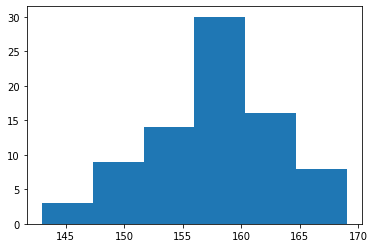

In [31]:
# 可視化する
%matplotlib inline
import matplotlib.pyplot as plt

_ = plt.hist(tall_list, bins=6)

# 教訓

- データを眺めていてもよくわからないが，度数分布を使うことで傾向をつかめる

    - このデータの場合は，「大体158cmの娘が多い」ことがわかる
    
- 詳細を犠牲にしてデータの傾向を掴む行為を縮約といい，グラフを作ることや統計量を求めることが当てはまる

階級値: [38, 43, 48, 53, 58, 63, 68]
度数: {'38': 3, '43': 11, '48': 33, '53': 19, '58': 7, '63': 5, '68': 2}
80
相対度数: {'38': 0.0375, '43': 0.1375, '48': 0.4125, '53': 0.2375, '58': 0.0875, '63': 0.0625, '68': 0.025}
累積度数: {'38': 0.0375, '43': 0.17500000000000002, '48': 0.5875, '53': 0.825, '58': 0.9125, '63': 0.975, '68': 1.0}


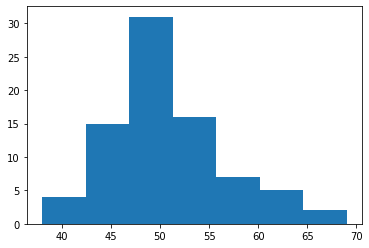

In [66]:
# 練習問題
# 女子大生の体重リスト
weights = [
    48, 54, 47, 50, 53, 43, 45, 43,
    44, 47, 58, 46, 46, 63, 49, 50,
    48, 43, 46, 45, 50, 53, 51, 58,
    52, 53, 47, 49, 45, 42, 51, 49,
    58, 54, 45, 53, 50, 69, 44, 50,
    58, 64, 40, 57, 51, 69, 58, 47,
    62, 47, 40, 60, 48, 47, 53, 48,
    52, 61, 55, 55, 48, 48, 46, 52,
    45, 38, 62, 47, 55, 50, 46, 47,
    55, 48, 50, 50, 54, 55, 48, 50
]

range_max = 70
range_min = 36
weight_range = range_max - range_min

class_num = 7
bin_value = ceil(weight_range / class_num)

class_values = [range_min + floor(bin_value / 2.) + v * (bin_value) for v in range(class_num)]
print('階級値: {}'.format(class_values))
classes = [(v - floor(bin_value / 2.), v + floor(bin_value / 2.)) for v in class_values]

freq_by_key = {}
for cls, cls_v in zip(classes, class_values):
    if str(cls_v) not in freq_by_key:
        freq_by_key[str(cls_v)] = 0
    for weight in weights:
        if cls[0] <= weight and weight <= cls[1]:
            freq_by_key[str(cls_v)] += 1
print('度数: {}'.format(freq_by_key))

for key in freq_by_key:
    freq_by_key[key] /= 80.
print('相対度数: {}'.format(freq_by_key))

keys = sorted(freq_by_key.keys())
for prev, curr in zip(keys, keys[1:]):
    freq_by_key[curr] += freq_by_key[prev]
print('累積度数: {}'.format(freq_by_key))

_ = plt.hist(weights, bins=class_num)